# Extracción ADT
### Script para extraer una sección de los datos de Aviso y guardarlos en un archivo netCDF

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import dask as dk

from dask.distributed import Client
from os import listdir
from os.path import isfile, join, getsize
import glob

In [2]:
xr.set_options(keep_attrs=True);

In [3]:
client = Client(n_workers=24, threads_per_worker=2, memory_limit=12e9)
client

Client Scheduler: tcp://127.0.0.1:49857 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 24 Cores: 48 Memory: 288.00 GB


## Read all files

In [4]:
ficheros=[]
for ianho in range(1993,2020):
    for imes in range(1,13):
        base_dir='/data/shareddata/Satelite/dataset-duacs-rep-global-merged-allsat-phy-l4/{}/{:02d}/dt_global_allsat_phy_l4_{}{:02d}*'.format(ianho,imes,ianho,imes)
        fichero=sorted(glob.glob(base_dir)) 
        for ifile in fichero:
            ficheros.append(ifile)
        #onlyfiles = [f for f in listdir(base_dir) if isfile(join(base_dir, f))]
        #ficheros.extend(onlyfiles)

## Load files

In [5]:
time_code='2D'

In [6]:
dsALL = xr.open_mfdataset(ficheros[::2])

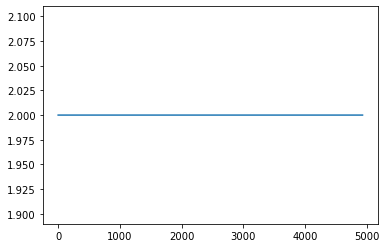

In [7]:
diff = np.diff(dsALL.time)/86400/1e9
plt.plot(diff)

In [8]:
#Select area
area_name='NorthPacific'
lat_area=slice(0,60)
lon_area=slice(120,260)

In [9]:
sla_area = dsALL.sla.sel(latitude=lat_area, longitude=lon_area)
sla_area

<xarray.DataArray 'sla' (time: 4931, latitude: 240, longitude: 560)>
dask.array<getitem, shape=(4931, 240, 560), dtype=float64, chunksize=(1, 240, 560), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1993-01-01 1993-01-03 ... 2019-12-31
  * latitude   (latitude) float32 0.125 0.375 0.625 0.875 ... 59.38 59.62 59.88
  * longitude  (longitude) float32 120.1 120.4 120.6 120.9 ... 259.4 259.6 259.9
Attributes:
    comment:        The sea level anomaly is the sea surface height above mea...
    grid_mapping:   crs
    long_name:      Sea level anomaly
    standard_name:  sea_surface_height_above_sea_level
    units:          m

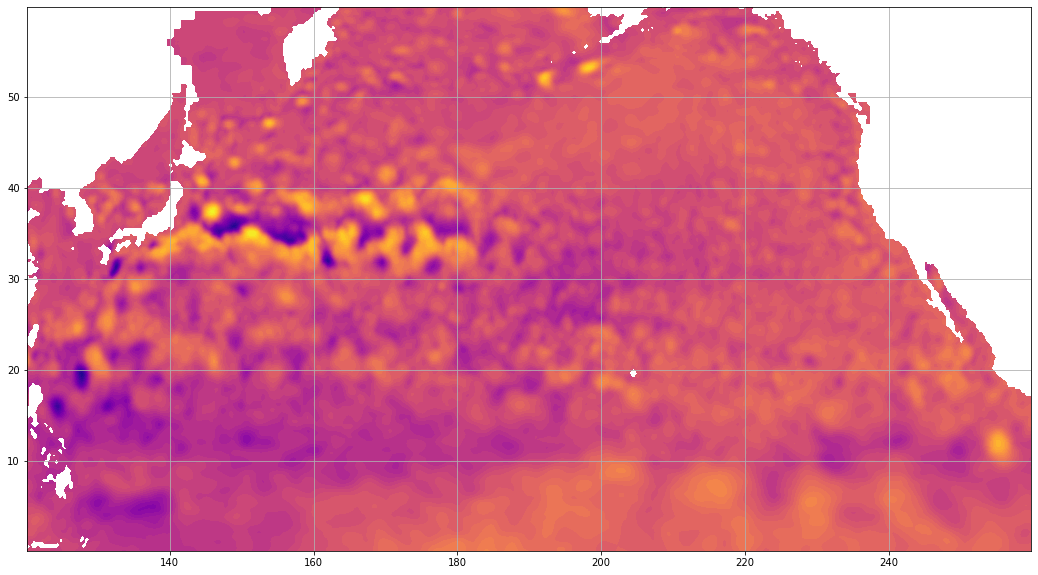

In [10]:
fig, ax= plt.subplots(figsize=(18,10))
ax.contourf(sla_area.longitude,sla_area.latitude,sla_area.isel(time=0),40,cmap='plasma')
ax.grid()

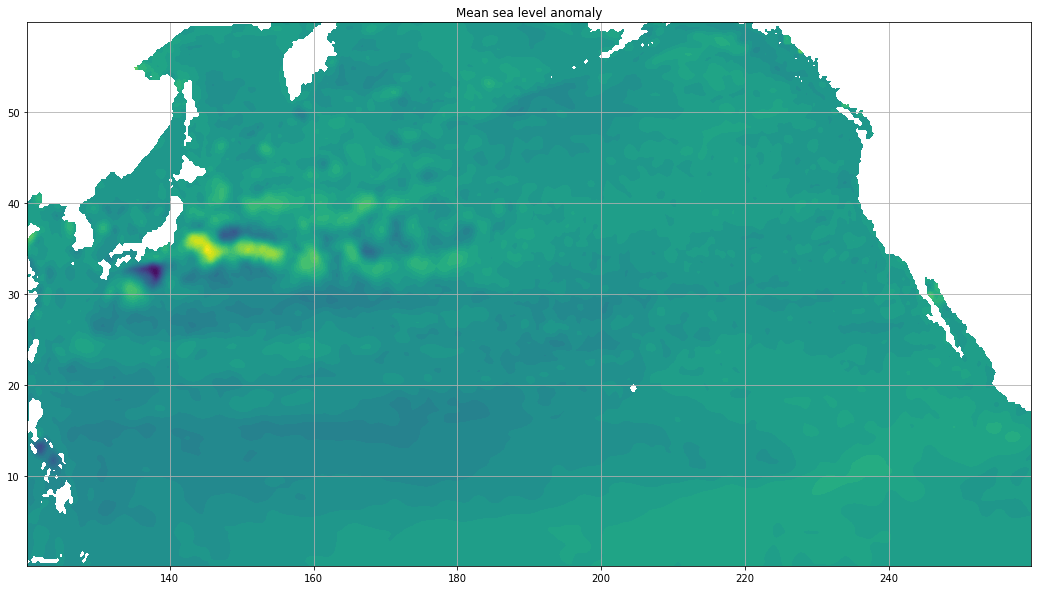

In [11]:
fig, ax= plt.subplots(figsize=(18,10))
ax.contourf(sla_area.longitude,sla_area.latitude,sla_area.mean(dim='time'),40,cmap='viridis')
ax.set_title('Mean sea level anomaly')
ax.grid()


In [12]:
sla_area.nbytes/1e9

5.3018112

## Load in memory

In [13]:
sla_area.load()

<xarray.DataArray 'sla' (time: 4931, latitude: 240, longitude: 560)>
array([[[-0.004 , -0.021 , -0.0371, ...,  0.0531,  0.0485,  0.0436],
        [    nan, -0.0281, -0.0435, ...,  0.0495,  0.046 ,  0.0424],
        [-0.0216,     nan, -0.0535, ...,  0.0388,  0.0376,  0.0367],
        ...,
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan]],

       [[-0.018 , -0.0316, -0.0434, ...,  0.0583,  0.0552,  0.0517],
        [    nan, -0.0386, -0.0501, ...,  0.0575,  0.0555,  0.0532],
        [-0.0361,     nan, -0.0591, ...,  0.0498,  0.0495,  0.0493],
        ...,
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan]],

       [[-0.0139, -0.0253, -0.0372, ...,  0.0597,  0.0592,  0.0574],
        [    nan, -0.0323, -0.0442, ...,  0.0606,  0.0606,  0.0596],
        [-0.035 ,     nan, -0.0562, ...,  0.0566,  0.0576,  0.0579],
        ...,
...
        ...,
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan]],

       [[ 0.0361,  0.0305,  0.026 , ...,  0.1199,  0.1183,  0.1171],
        [    nan,  0.0398,  0.0354, ...,  0.1236,  0.1225,  0.1216],
        [ 0.0468,     nan,  0.0426, ...,  0.1286,  0.1283,  0.1279],
        ...,
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan]],

       [[ 0.0275,  0.024 ,  0.0208, ...,  0.1277,  0.1284,  0.1287],
        [    nan,  0.0321,  0.028 , ...,  0.1301,  0.1312,  0.132 ],
        [ 0.0408,     nan,  0.0331, ...,  0.1322,  0.1338,  0.135 ],
        ...,
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan]]])
Coordinates:
  * time       (time) datetime64[ns] 1993-01-01 1993-01-03 ... 2019-12-31
  * latitude   (latitude) float32 0.125 0.375 0.625 0.875 ... 59.38 59.62 59.88
  * longitude  (longitude) float32 120.1 120.4 120.6 120.9 ... 259.4 259.6 259.9
Attributes:
    comment:        The sea level anomaly is the sea surface height above mea...
    grid_mapping:   crs
    long_name:      Sea level anomaly
    standard_name:  sea_surface_height_above_sea_level
    units:          m

In [14]:
file_out='sla_'+area_name+time_code+'.nc'

In [15]:
sla_area.to_netcdf(file_out)